In [1]:
import feather

from math import log

import numpy as np
import pandas as pd

from scipy import sparse

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '../data/processed/EDY/holdings_summary_s_s.feather'
summary = feather.read_dataframe(path)
summary.shape

In [151]:
### Load the data files

path = '../data/processed/EDY/holdings_s_s.npz'
holdings = sparse.load_npz(path)

path = '../data/processed/EDY/holdings_b_b.npz'
holdings_b = sparse.load_npz(path)

print(holdings.shape)
print(holdings_b.shape)

(4346, 10241)
(4346, 10241)


In [152]:
holdings = holdings
holdings_b = holdings_b

In [153]:
port_number = holdings.shape[0]
port_number

4346

### Load stock map

In [206]:
path = '../data/interim/stock_map.npy'
stock_map = np.load(path)


path = '../data/interim/stock_map_t.npy'
stock_map_t = np.load(path) 

sm = stock_map.item().get('item1')

sm = {v: k for k, v in sm.items()}

In [215]:
path = '../data/raw/holdings_co_info.feather'
stock_names = feather.read_dataframe(path)
print(stock_names.shape)

stock_names = stock_names.drop_duplicates()
stock_names.sample()

stock_names_dict = {row[0]: row[1] for row in stock_names.values}

(10000000, 2)


In [ ]:
def get_stock_name(num):

In [217]:
crsp_comp_key = sm.get(18834)
name = stock_names_dict.get(crsp_comp_key)

In [214]:
stock_names_dict

{3011494.0: 'WYNN RESORTS LTD',
 3011528.0: 'YAHOO INC',
 3011784.0: 'COMPUGEN LTD',
 3009220.0: 'SANDISK CORP',
 3011724.0: 'SINA CORP',
 3008768.0: 'REALNETWORKS INC',
 3009660.0: 'SOUTHWEST AIRLINES CO',
 3011660.0: 'GARMIN LTD',
 3011363.0: 'WHOLE FOODS MARKET INC',
 3009777.0: 'STARBUCKS CORP',
 3011570.0: 'ZIMMER HOLDINGS INC',
 3002097.0: 'CERUS CORPORATION',
 3011679.0: 'MARVELL TECHNOLOGY GROUP LTD',
 3011745.0: 'WILLIS GROUP HOLDINGS LIMITED',
 3011684.0: 'NABORS INDUSTRIES LTD',
 3005722.0: 'JANUS CAP GROUP INC',
 3005762.0: 'JUNIPER NETWORKS INC',
 3007209.0: 'NETWORK APPLIANCE INC',
 3009481.0: 'SILICON LABORATORIES INC',
 3005776.0: 'K L A TENCOR CORP',
 3001734.0: 'C N E T NETWORKS INC',
 3008061.0: 'PEOPLESOFT INC',
 3001590.0: 'BROADCOM CORP',
 3002859.0: 'D R HORTON INC',
 3006742.0: 'MICRON TECHNOLOGY INC',
 3001075.0: 'B J SERVICES CO',
 3006085.0: 'LEVEL 3 COMMUNICATIONS INC',
 3010335.0: '3COM CORP',
 3000509.0: 'AMAZON COM INC',
 3000786.0: 'APPLERA CORP',
 30020

# New 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [156]:
test_holdings = holdings_d[:5_000,:]
test_holdings.shape

(5000, 66285)

In [27]:
# Get the text
text = ["Apple Google Facebook",
        "Apple Amazon Facebook"
       ]

# Vectorize the text
count = CountVectorizer(
#            min_df = 3, # A word has to appear at least x times to be included
#            max_df = 0.90, # Top (1-x)% most frequent words are removed since they propably are of limited value
#            ngram_range = (1,4) # What kind of ngrams to include. We include everything from 1-grams to 4-grams
            )

txt_count = count.fit_transform(text)


<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [164]:
# Fit LDA model
n_components = 3

lda = LatentDirichletAllocation(
    n_components = n_components, # How many topics are there -> hyper parameter
    random_state = 123, # random seed for reproducability
    learning_method = 'batch', # Evaluate all documents at once as opposed to the online method
    max_iter = 50, # After how many evaluation steps should the algo stop. Choose fewer for faster processing
    verbose = True, # Show each step
    n_jobs = 1,# Normally this parameter controlls how many parallel processes are used. However, on our MacBook it didn't work
)

X_topics = lda.fit_transform(test_holdings)
lda.components_.shape

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of ma

(3, 66285)

In [165]:
X_topics.shape

(5000, 3)

In [170]:
apply(X_topics.argmax())

NameError: name 'apply' is not defined

In [192]:
topics_rounded = pd.DataFrame(X_topics.round())
topics_rounded = topics_rounded.idxmax(1)

In [193]:
summary_joined = summary
summary_joined['topic'] = topics_rounded
a = summary_joined.loc[:1000,['crsp_obj_cd']]
b = summary_joined.loc[:1000,['topic']]

pd.crosstab(summary_joined['crsp_obj_cd'],summary_joined['topic'])

topic,0,1,2
crsp_obj_cd,,,
EDYG,1681,483,954
EDYH,428,133,185
EDYI,293,75,114


In [216]:
# Print most important words of every topic
print("The most important words of our four topics are:")

n_top_words = 10
feature_names = np.arange(test_holdings.shape[1])
for topic_idx, topic in enumerate(lda.components_):
    print()
    print("Topic %d:" % (topic_idx + 1))
    print([feature_names[i]
    for i in topic.argsort()\
        [:-n_top_words - 1:-1]])

The most important words of our four topics are:

Topic 1:
[552, 461, 6324, 8725, 640, 587, 8904, 524, 533, 2089]

Topic 2:
[18834, 18761, 13852, 18902, 8407, 14292, 19136, 18924, 18869, 18729]

Topic 3:
[4546, 5201, 5205, 19246, 5478, 5084, 8946, 15112, 23842, 18889]



# Old IDF TF calc

### Round to int

In [12]:
holdings.data = holdings.data.round().astype(int)

## Calc IDF

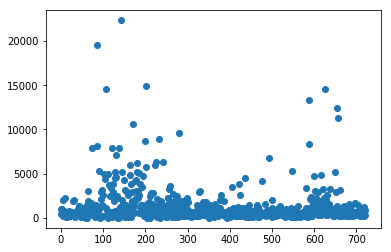

In [13]:
col_sum = holdings[:,:].sum(0).T
plt.plot(col_sum, 'o')

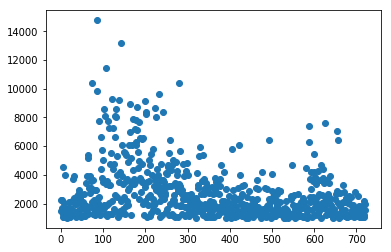

In [14]:
col_sum_b = holdings_b.sum(0).T
plt.plot(col_sum_b,'o')

In [15]:
def IDF_calc(x,port_number):
    return 1 + log(port_number / (x))
IDF_calc = np.vectorize(IDF_calc)

IDFs = IDF_calc(col_sum_b,port_number)

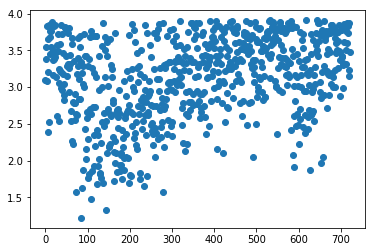

In [16]:
plt.plot(IDFs,'o')

## Multiply IDF with TF

In [19]:
IDFs_matrix = np.tile(IDFs.T,(port_number,1))

In [20]:
IDFs_matrix.shape

(18383, 722)

In [21]:
holdings.shape

(18383, 722)

In [22]:
holdings_transformed = holdings.multiply(IDFs_matrix).tocsr()

In [23]:
holdings_transformed

<18383x722 sparse matrix of type '<class 'numpy.float64'>'
	with 1017706 stored elements in Compressed Sparse Row format>

## PCA

In [24]:
from sklearn.decomposition import TruncatedSVD

In [25]:
X = holdings_transformed.T
svd = TruncatedSVD(n_components=100)
svd.fit(X)  

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
       random_state=None, tol=0.0)

In [26]:
holdings_transformed = svd.components_

In [27]:
print(svd.explained_variance_ratio_)  
print()
print(svd.explained_variance_ratio_.sum())  


[0.16958227 0.12821575 0.11566701 0.04782648 0.02848757 0.00906215
 0.00772085 0.00701594 0.00609365 0.00575505 0.00555664 0.0049637
 0.00503221 0.00489814 0.00454632 0.0043051  0.00396838 0.00379985
 0.00357691 0.00343292 0.00334773 0.0032885  0.00320618 0.00314896
 0.0030873  0.00304357 0.00301499 0.00295103 0.0028499  0.00281063
 0.00277511 0.00272702 0.00270326 0.00264439 0.00260705 0.00255982
 0.00249986 0.00246394 0.00241683 0.00238966 0.00235584 0.00233047
 0.00229558 0.00225376 0.00223093 0.00222299 0.00220348 0.00216811
 0.00215207 0.00211029 0.00206409 0.00205381 0.00203341 0.00201374
 0.0019994  0.0019809  0.00194386 0.00193262 0.00192782 0.00190416
 0.00189626 0.00187932 0.00183167 0.00181207 0.00179723 0.00178235
 0.00176827 0.00176091 0.00175638 0.00172288 0.0017174  0.00169548
 0.00167386 0.00166013 0.00164796 0.00164037 0.00162483 0.00161909
 0.00160183 0.00158907 0.00157462 0.00155428 0.00153231 0.00152968
 0.00151648 0.00151708 0.00149635 0.00148126 0.00147872 0.00147

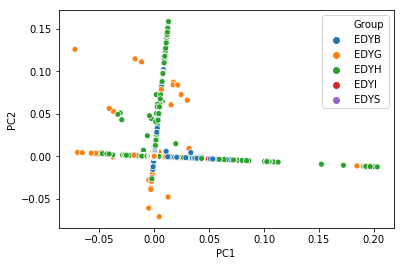

In [28]:
result_mat = pd.DataFrame({'PC1': svd.components_[1], 'PC2':svd.components_[0], 'Group': summary['crsp_obj_cd']})

sns.scatterplot('PC1','PC2', hue='Group', data = result_mat)

In [30]:
holdings_transformed = pd.DataFrame(holdings_transformed).T

## Save

In [27]:
### Load the data files
path = '../data/processed/EDY/holdings_s_lsa.npz'
feather.write_dataframe(holdings_transformed,path)